## Practice Exercise 2

In this assignment, you will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. You will have to download a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections, and submit the code.

#### Some tips before starting the assignment

1. Identify the task to be performed correctly, and only then proceed to write the required code. Don’t perform any incorrect analysis or look for information that isn’t required for the assignment.
2. In some cases, the variable names have already been assigned, and you just need to write code against them. In other cases, the names to be given are mentioned in the instructions. We strongly advise you to use the mentioned names only.
3. Always keep inspecting your data frame after you have performed a particular set of operations.
4. There are some checkpoints given in the IPython notebook provided. They're just useful pieces of information you can use to check if the result you have obtained after performing a particular task is correct or not.
5. Note that you will be asked to refer to documentation for solving some of the questions. That is done on purpose for you to learn new commands and also how to use the documentation.

In [106]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [169]:
# Write your code for importing the csv file here
movies = pd.read_csv('movies.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [108]:
# Write your code for inspection here
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [109]:
movies.shape

(3853, 28)

#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>
-  <font color='red'>(3821, 26)</font>
-  <font color='red'>(3879, 28)</font>
-  <font color='red'>(3853, 28)</font>
-  <font color='red'>(3866, 26)</font>

In [110]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 28 columns):
color                        3851 non-null object
director_name                3853 non-null object
num_critic_for_reviews       3852 non-null float64
duration                     3852 non-null float64
director_facebook_likes      3853 non-null float64
actor_3_facebook_likes       3847 non-null float64
actor_2_name                 3852 non-null object
actor_1_facebook_likes       3853 non-null float64
gross                        3853 non-null float64
genres                       3853 non-null object
actor_1_name                 3853 non-null object
movie_title                  3853 non-null object
num_voted_users              3853 non-null int64
cast_total_facebook_likes    3853 non-null int64
actor_3_name                 3847 non-null object
facenumber_in_poster         3847 non-null float64
plot_keywords                3823 non-null object
movie_imdb_link              3853 non-

#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

-  <font color='red'>3</font>
-  <font color='red'>6</font>
-  <font color='red'>9</font>
-  <font color='red'>12</font>

In [170]:
print((movies.isnull().sum()>0).sum())

12


In [111]:
cot=0
for x in movies.columns:
    c=movies[x].count()
    if c != 3853:
        cot=cot+1
cot

12

### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [171]:
# Check the 'drop' function in the Pandas library - dataframe.drop(list_of_unnecessary_columns, axis = )
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations
movies.drop(['color',
'director_facebook_likes',
'actor_1_facebook_likes',
'actor_2_facebook_likes',
'actor_3_facebook_likes',
'actor_2_name',
'cast_total_facebook_likes',
'actor_3_name',
'duration',
'facenumber_in_poster',
'content_rating',
'country',
'movie_imdb_link',
'aspect_ratio',
'plot_keywords'], axis=1, inplace=True)


#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>
-  <font color='red'>10</font>
-  <font color='red'>13</font>
-  <font color='red'>15</font>
-  <font color='red'>17</font>

In [172]:
len(movies.columns)

13

**Subtask 2.2: Inspect Null values**

As you have seen above, there are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [173]:
round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [114]:
p = {}
for x in movies.columns:
    c=movies[x].count()
    per = (((len(movies))-c)/len(movies))*100
    p[x]=per
p 

{'director_name': 0.0,
 'num_critic_for_reviews': 0.02595380223202699,
 'gross': 0.0,
 'genres': 0.0,
 'actor_1_name': 0.0,
 'movie_title': 0.0,
 'num_voted_users': 0.0,
 'num_user_for_reviews': 0.0,
 'language': 0.07786140669608098,
 'budget': 0.0,
 'title_year': 0.0,
 'imdb_score': 0.0,
 'movie_facebook_likes': 0.0}

#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

In [115]:
language= 0.07786

**Subtask 2.3: Fill NaN values**

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [174]:
movies.loc[pd.isnull(movies['language']), ['language']] = 'English'

In [175]:
(movies.language == 'English').sum()

3674

In [116]:
# Write your code for filling the NaN values in the 'language' column here
movies['language']=movies['language'].astype('str')
movies['language']=movies['language'].apply(lambda x: 'English' if x=='NaN' else x)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
3849,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
3850,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
3851,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>
-  <font color='red'>3670</font>
-  <font color='red'>3674</font>
-  <font color='red'>3668</font>
-  <font color='red'>3672</font>

In [117]:
movies[movies.language=='English'].count()

director_name             3671
num_critic_for_reviews    3670
gross                     3671
genres                    3671
actor_1_name              3671
movie_title               3671
num_voted_users           3671
num_user_for_reviews      3671
language                  3671
budget                    3671
title_year                3671
imdb_score                3671
movie_facebook_likes      3671
dtype: int64

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [176]:
# Write your code for unit conversion here
movies[['budget','gross']]=movies[['budget','gross']].floordiv(1000000)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Shane Carruth,143.0,0.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0,2004.0,7.0,19000
3849,Neill Dela Llana,35.0,0.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0,2005.0,6.3,74
3850,Robert Rodriguez,56.0,2.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0,1992.0,6.9,0
3851,Edward Burns,14.0,0.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0,2011.0,6.4,413


**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [177]:
# Write your code for creating the profit column here
movies['profit']=movies['gross']-movies['budget']

In [178]:
# Write your code for sorting the dataframe here
movies.sort_values(by=['profit'],inplace=True,ascending=False)

In [179]:
top10 = movies.head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
28,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
25,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
2704,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
2748,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0
16,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
482,Roger Allers,186.0,422.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.0
230,George Lucas,320.0,474.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.0
64,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0
419,Gary Ross,673.0,407.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.0


**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>
-  <font color='red'>E.T. the Extra-Terrestrial</font>
-  <font color='red'>The Avengers</font>
-  <font color='red'>The Dark Knight</font>
-  <font color='red'>Titanic</font>

In [129]:
top10.iloc[4]

director_name                        Steven Spielberg
num_critic_for_reviews                            215
gross                                             434
genres                                  Family|Sci-Fi
actor_1_name                             Henry Thomas
movie_title               E.T. the Extra-Terrestrial 
num_voted_users                                281842
num_user_for_reviews                              515
language                                      English
budget                                             10
title_year                                       1982
imdb_score                                        7.9
movie_facebook_likes                            34000
profit                                            424
Name: 2748, dtype: object

**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [180]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
movies.sort_values(by=['imdb_score'],ascending=False,inplace=True)
IMDb_Top_250=movies.head(250)

In [136]:
IMDb_Top_250['Rank']= np.array([x for x in range(1,251)])

C:\Users\kutog\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1795,Frank Darabont,199.0,28.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.0
3016,Francis Ford Coppola,208.0,134.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.0
2543,Francis Ford Coppola,149.0,57.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.0
64,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0
1737,Steven Spielberg,174.0,96.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273.0,English,22.0,1993.0,8.9,41000,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Jon Favreau,486.0,318.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Iron Man,696338,1055.0,English,140.0,2008.0,7.9,10000,178.0
3405,Richard Linklater,405.0,8.0,Drama|Romance,Seamus Davey-Fitzpatrick,Before Midnight,95362,270.0,English,3.0,2013.0,7.9,62000,5.0
3565,Fabián Bielinsky,94.0,1.0,Crime|Drama|Thriller,Ricardo Darín,Nine Queens,38215,125.0,Spanish,1.0,2000.0,7.9,0,0.0
668,Quentin Tarantino,596.0,54.0,Crime|Drama|Mystery|Thriller|Western,Craig Stark,The Hateful Eight,272839,1018.0,English,44.0,2015.0,7.9,114000,10.0


#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>
-  <font color='red'>7.5 to 8</font>
-  <font color='red'>8 to 8.5</font>
-  <font color='red'>8.5 to 9</font>
-  <font color='red'>9 to 9.5</font>
-  <font color='red'>9.5 to 10</font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

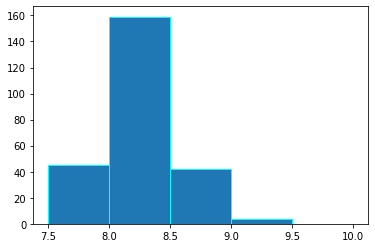

In [183]:
import matplotlib.pyplot as plt
IMDb_Top_250 = movies.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)

import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()

In [143]:
p=q=r=s=t=0
d={}
for x in IMDb_Top_250['imdb_score']:
    if x>=7.5 and x<8 :
        d['7.5:8']=p+1
        p=p+1
    elif x>=8 and x<8.5 :
        d['8:8.5']=q+1
        q=q+1
    elif x>=8.5 and x<9 :
        d['8.5:9']=r+1
        r=r+1
    elif x>=9 and x<9.5 :
        d['9:9.5']=s+1
        s=s+1
    elif x>=9.5 and x<10 :
        d['9.5:10']=t+1 
        t=t+1
print(d)              

{'9:9.5': 4, '8.5:9': 43, '8:8.5': 168, '7.5:8': 35}


**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [147]:
# Write your code for creating three new dataframes here
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']

In [148]:
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio']

In [151]:
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']

In [156]:
# Write your code for combining the three dataframes here
Combined = Meryl_Streep.append([Leo_Caprio, Brad_Pitt])

In [166]:
# Write your code for grouping the combined dataframe here
dff= Combined.groupby(['actor_1_name'])

In [168]:
# Write the code for finding the mean of critic reviews and audience reviews here
dff[['num_critic_for_reviews' ,'num_user_for_reviews']].mean()

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [184]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64